In [2]:
import pandas as pd
import numpy as np   ### Support for large, multi-dimensional arrays and matrices. Has a large collection of high-level mathematical functions.
import matplotlib.pyplot as plt  
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, plot_roc_curve,roc_curve,auc
from sklearn.model_selection import cross_val_score
from time import time

dataset = pd.read_csv('FinalDataset.csv')

In [3]:
#shuffle the dataset
dataset = dataset.reindex(np.random.permutation(dataset.index))

In [4]:
#Separate Features and Labels
features = dataset.drop('Class', axis=1)
# features = dataset.iloc[:,50:80] #We can slice the dataframe and test with different feature combinations.
labels = dataset['Class']

default split ratios is train:valid:test =3:1:1

In [5]:
#Split the dataset in to Training, Validation and Test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [6]:
# DT with default hyperparameters
dt1 = DecisionTreeClassifier()
start =time()
dt1.fit(X_train, y_train)
end = time()
y_pred1 = dt1.predict(X_val)
print(y_pred1)
print('Training Latency: {}ms'.format(round((end - start)*1000, 1)))

['Benign' 'Benign' 'Mirai_SYN' ... 'Mirai_SYN' 'Benign' 'Mirai_SYN']
Training Latency: 206.6ms


# Evaluate the Model using Accuracy, Precision, Recall, Latency

In [7]:
def evaluate_model(model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred, pos_label='Mirai_SYN'), 3)  # True Positives/All Positives (TP+FN)
    recall = round(recall_score(labels, pred, pos_label='Mirai_SYN'), 3)  # True positives/ Actual positives (TP+FN)
      
    print('Accuracy: {} / Precision: {} / Recall: {} / Prediction Latency: {}ms'.format(accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))
    confusionMatrix = confusion_matrix(labels, pred)
    print(confusionMatrix)

In [8]:
evaluate_model(dt1, X_val, y_val)

Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Prediction Latency: 5.0ms
[[3914    0]
 [   1 3897]]


# Compare different values for hyperparameters

## splitter

In [9]:
dt2 = DecisionTreeClassifier(splitter="random")
start =time()
dt2.fit(X_train, y_train)
end = time()
y_pred2 = dt2.predict(X_val)
print(y_pred2)
print('Training Latency: {}ms'.format(round((end - start)*1000, 1)))

['Benign' 'Benign' 'Mirai_SYN' ... 'Mirai_SYN' 'Benign' 'Mirai_SYN']
Training Latency: 47.9ms


In [10]:
evaluate_model(dt2, X_val, y_val)

Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Prediction Latency: 6.0ms
[[3914    0]
 [   1 3897]]


## max_depth

Hence there are 115 features, the depth of the tree is at most 115.

In [11]:
latency = []
acc = []
recalls = []
for i in range(5, 116):
    dt = DecisionTreeClassifier(max_depth=i)
    start =time()
    dt.fit(X_train, y_train)
    end = time()
    y_pred = dt.predict(X_val)
    accuracy = round(accuracy_score(y_val, y_pred), 3)
    recall = round(recall_score(y_val, y_pred, pos_label='Mirai_SYN'), 3)
    acc.append(accuracy)
    latency.append(round((end - start)*1000, 1))    
    recalls.append(recall)

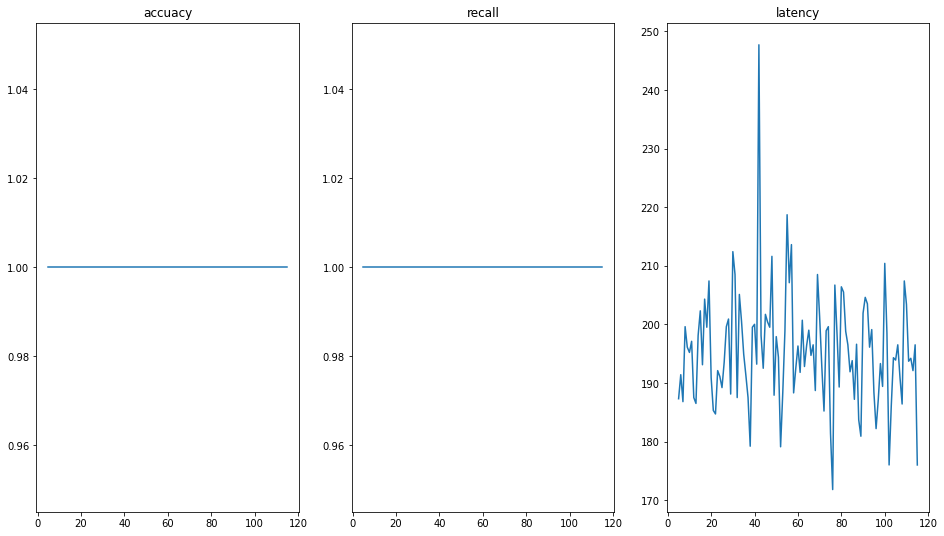

In [14]:
x = [i for i in range(5,116)]
plt.figure(figsize=(16, 9))
plt.subplot(1,3,1)
plt.plot(x,acc),plt.title("accuacy")
plt.subplot(1,3,2)
plt.plot(x,recalls),plt.title("recall")
plt.subplot(1,3,3)
plt.plot(x,latency),plt.title("latency")
plt.show()

We can see that the accuracy and recall are very similar. Therefore, we should find a appropriate max_depth to ensure least lantency.

In [13]:
minlan = min(latency)
depth = latency.index(minlan)+6
depth

77

After training the models several times, the result of appropriate max_depth is not a unique value. The figure of lantency shows that the difference of lantency between various max_depth are less than 50ms.  

## min_samples_split

In [26]:
splitp = int(0.001*X_train.shape[0])
splitp

23

In [27]:
latency = []
acc = []
recalls = []
for i in range(1, 101):
    dt = DecisionTreeClassifier(min_samples_split=splitp*i)
    start =time()
    dt.fit(X_train, y_train)
    end = time()
    y_pred = dt.predict(X_val)
    accuracy = round(accuracy_score(y_val, y_pred), 3)
    recall = round(recall_score(y_val, y_pred, pos_label='Mirai_SYN'), 3)
    acc.append(accuracy)
    latency.append(round((end - start)*1000, 1))    
    recalls.append(recall)

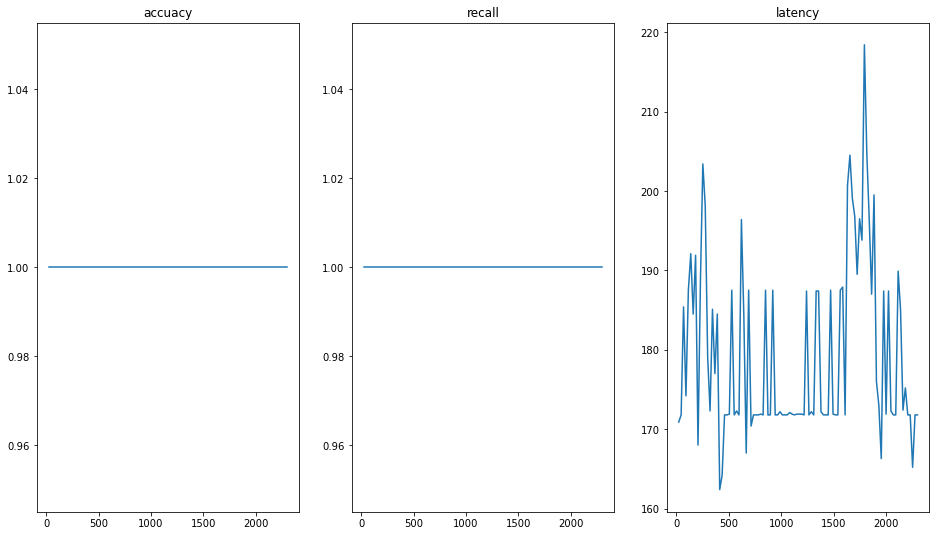

In [15]:
x = [i*splitp for i in range(1,101)]
plt.figure(figsize=(16, 9))
plt.subplot(1,3,1)
plt.plot(x,acc),plt.title("accuacy")
plt.subplot(1,3,2)
plt.plot(x,recalls),plt.title("recall")
plt.subplot(1,3,3)
plt.plot(x,latency),plt.title("latency")
plt.show()

## max_features 

In [16]:
latency = []
acc = []
recalls = []
for i in range(5, 116):
    dt = DecisionTreeClassifier(max_features=i)
    start =time()
    dt.fit(X_train, y_train)
    end = time()
    y_pred = dt.predict(X_val)
    accuracy = round(accuracy_score(y_val, y_pred), 3)
    recall = round(recall_score(y_val, y_pred, pos_label='Mirai_SYN'), 3)
    acc.append(accuracy)
    latency.append(round((end - start)*1000, 1))    
    recalls.append(recall)

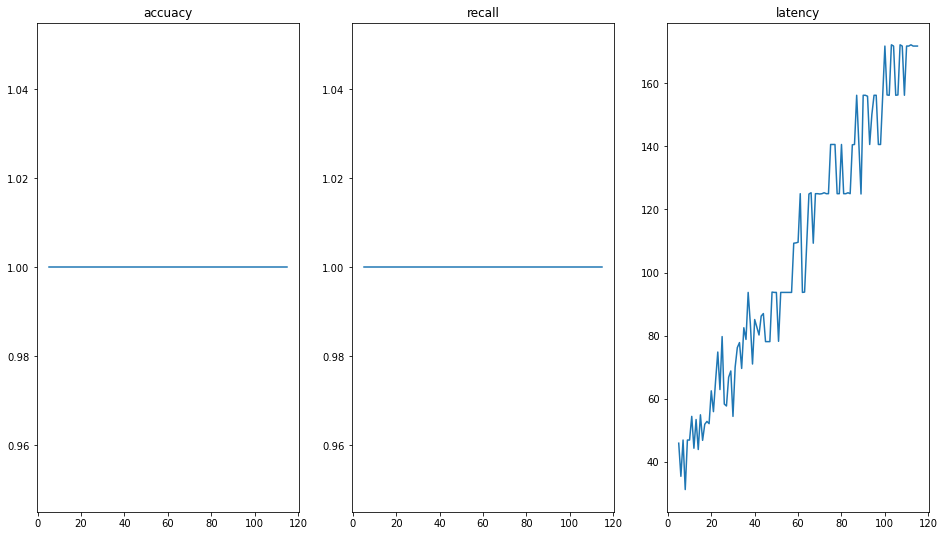

In [17]:
x = [i for i in range(5,116)]
plt.figure(figsize=(16, 9))
plt.subplot(1,3,1)
plt.plot(x,acc),plt.title("accuacy")
plt.subplot(1,3,2)
plt.plot(x,recalls),plt.title("recall")
plt.subplot(1,3,3)
plt.plot(x,latency),plt.title("latency")
plt.show()

## split ratios 

### train:valid:test = 4:3:3

In [32]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(features, labels, test_size=0.6, random_state=42)
X_test2, X_val2, y_test2, y_val2 = train_test_split(X_test2, y_test2, test_size=0.5, random_state=42)

In [33]:
# DT with default hyperparameters
dt3 = DecisionTreeClassifier()
start =time()
dt3.fit(X_train2, y_train2)
end = time()
y_pred3 = dt3.predict(X_val2)
print(y_pred3)
print('Training Latency: {}ms'.format(round((end - start)*1000, 1)))

['Benign' 'Mirai_SYN' 'Benign' ... 'Mirai_SYN' 'Benign' 'Mirai_SYN']
Training Latency: 134.7ms


In [34]:
evaluate_model(dt3, X_val2, y_val2)

Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Prediction Latency: 6.1ms
[[5882    0]
 [   0 5835]]


### train:valid:test = 8:1:1 

In [35]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(features, labels, test_size=0.2, random_state=42)
X_test3, X_val3, y_test3, y_val3 = train_test_split(X_test3, y_test3, test_size=0.5, random_state=42)

In [36]:
# DT with default hyperparameters
dt4 = DecisionTreeClassifier()
start =time()
dt4.fit(X_train3, y_train3)
end = time()
y_pred4 = dt4.predict(X_val3)
print(y_pred4)
print('Training Latency: {}ms'.format(round((end - start)*1000, 1)))

['Mirai_SYN' 'Mirai_SYN' 'Benign' ... 'Mirai_SYN' 'Mirai_SYN' 'Benign']
Training Latency: 270.3ms


In [37]:
evaluate_model(dt4, X_val3, y_val3)

Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Prediction Latency: 3.0ms
[[1956    0]
 [   0 1950]]


# Comapre the results 

### 1. Compare the performance of k-NN and DT for the given classification task using accuracy, precision, recall, and latency as the metrics. 

   In my opinion, DT performs better than K-NN for this dataset. DT has higher accuracy, precision and recall than K-NN attempted models. Meanwhile, DT has dramatically less prediction latency than K-NN. However, K-NN has less training latency.

### 2. Show the confusion matrix and the RoC curve

use splitter="random" as the hyperparameters of DT and the split ratios is train:valid:test =3:1:1

In [24]:
evaluate_model(dt2, X_test, y_test)

Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Prediction Latency: 6.0ms
[[3923    0]
 [   1 3887]]


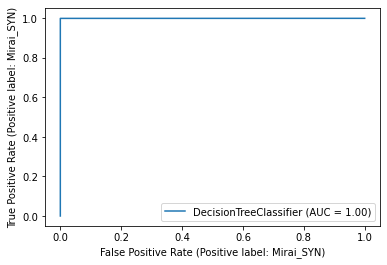

In [25]:
plot_roc_curve(dt2, X_test, y_test)

### 3. Comment on performance of DT by using different values for hyperparameters (splitter, max_depth, min_samples_split, max_features) and split ratios (train:valid:test = 4:3:3, 3:1:1, 8:1:1).

#### splitter

In [17]:
evaluate_model(dt1, X_val, y_val)
evaluate_model(dt2, X_val, y_val)

Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Prediction Latency: 5.3ms
[[3883    0]
 [   0 3929]]
Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Prediction Latency: 4.0ms
[[3883    0]
 [   0 3929]]


When change the splitter from 'best' to 'random', Training Latency witness a sharp decline from 206 to 48, prediction latency is slightly higher, but accuracy,precision,recall isn't change at all. So I think random is a better choice in this case

#### max_depth

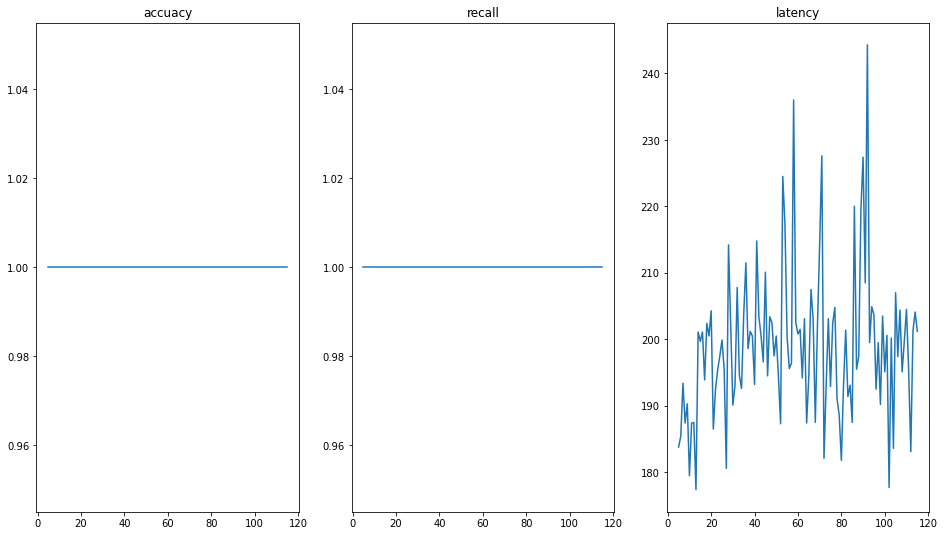

In [16]:
x = [i for i in range(5,116)]
plt.figure(figsize=(16, 9))
plt.subplot(1,3,1)
plt.plot(x,acc),plt.title("accuacy")
plt.subplot(1,3,2)
plt.plot(x,recalls),plt.title("recall")
plt.subplot(1,3,3)
plt.plot(x,latency),plt.title("latency")
plt.show()

Maybe because the database is too small, change the max depth do not
change the accuray and recall, and the latency vary from time to time
A smaller max depth may reduce the accuracy and recall when the data is larger

#### min_samples_split

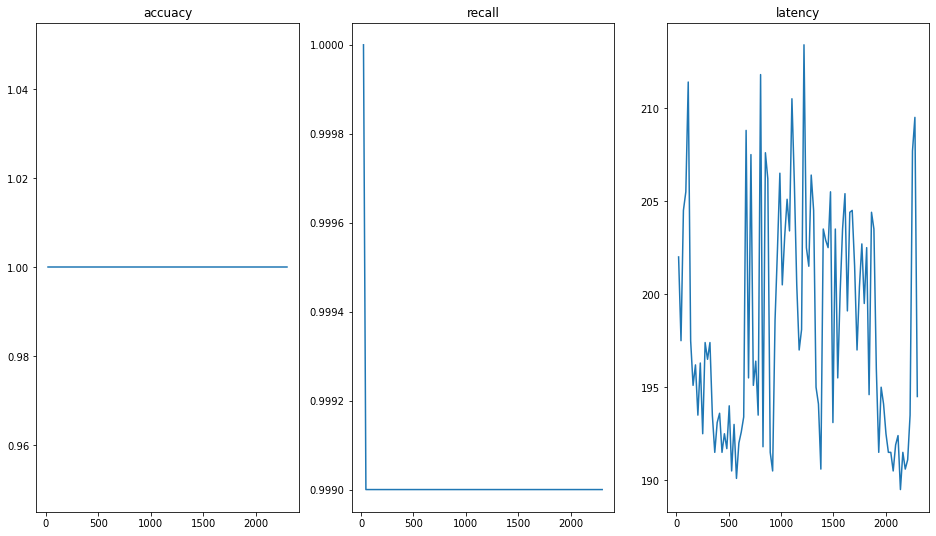

In [28]:
x = [i*splitp for i in range(1,101)]
plt.figure(figsize=(16, 9))
plt.subplot(1,3,1)
plt.plot(x,acc),plt.title("accuacy")
plt.subplot(1,3,2)
plt.plot(x,recalls),plt.title("recall")
plt.subplot(1,3,3)
plt.plot(x,latency),plt.title("latency")
plt.show()

The result is simailar to max_depth, recall is a little similar when min_sample_split increase

#### max_features 

Unfortunately, recall and accuracy remain the same， higher max features means more feature to consider
so latency increase when it increase

#### split ratios 

When train:valid:test = 4:3:3 training time is shorter than the default ratio, by contrast 8:1:1
increased time it required